## Notebook de apresentação de análise do dataset

In [1]:
!pip install googletrans

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 983kB 6.5MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 102kB 7.2MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=18c832b4ba8907fde89097d397fa46850d2ca48adb3d775f9ed73edde1ceb1af
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=5f4250ae27c9491fadf1d438edff74ba0f8de5deaaaf4e0e0ccf6b960b7bfa69
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [2]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


### Importação dos pacotes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.io.json import json_normalize
import time
import googletrans as Translator
from textblob import TextBlob

### Lendo o dataset e os arquivos que possuem o resultado da análise de sentimento

In [4]:
#Dataset
df_dataset = pd.read_json('http://tiagodemelo.info/datasets/dataset-v2.dat', lines=True)
#df_dataset = pd.read_csv('/content/drive/MyDrive/UEA - Pós Ciência de Dados/2. Programação para Ciência de Dados/ds-proc-dados-uea/artefatos/dados/dataset.csv', index_col=0)

#Subjetividade e polaridade indicados pelo TextBlob de todos os comentários
df_comentarios = pd.read_csv('/content/drive/MyDrive/UEA - Pós Ciência de Dados/2. Programação para Ciência de Dados/ds-proc-dados-uea/artefatos/dados/subjectivity-polarity-comentary.csv', index_col=0)

#Subjetividade e polaridade indicados pelo TextBlob de todas as sentenças
df_sentencas = pd.read_csv('/content/drive/MyDrive/UEA - Pós Ciência de Dados/2. Programação para Ciência de Dados/ds-proc-dados-uea/artefatos/dados/subjectivity-polarity-sentences.csv', index_col=0)

#Gabarito
df_gabarito = pd.read_csv('/content/drive/MyDrive/UEA - Pós Ciência de Dados/2. Programação para Ciência de Dados/ds-proc-dados-uea/artefatos/dados/gabarito.csv', index_col=0)

In [5]:
df_normalize = pd.json_normalize(df_dataset.itemReviewed)
df_normalize.columns = ['name', 'website', 'email', 'phoneNumber', 'averageRating', 'streetAddress', 'addressLocality', 'addressRegion', 'postalCode', 'country']
df_addressRegion = df_normalize.addressRegion.value_counts(ascending=False)

Definindo valores que indicam as subjetividade e polaridades

In [6]:
SUBJETIVIDADE = 0.28  # Objetivo < SUBJETIVIDADE | Opinativo >= SUBJETIVIDADE
POLARIDADE_N = 0.15   # Negativo < POLARIDADE_N 
POLARIDADE_P = 0.2    # Positivo >= POLARIDADE_P
                      # [(Neutro >= POLARIDADE_N) e (Neutro < POLARIDADE_P)]

---
# Apresentação dos resultados

## Distribuição dos idiomas utilizados

In [7]:
df_dataset['language'].value_counts()

pt      99128
en        789
None       45
es         17
           17
ru          1
it          1
iw          1
sv          1
Name: language, dtype: int64

## Quantidade de restaurantes

In [8]:
df_normalize.name.value_counts(ascending=False)

Coco Bambu Frutos do Mar                 1083
Camarões Restaurante                     1068
Mangai                                   1023
Camarões Potiguar                         699
Imperador dos Camarões                    661
                                         ... 
Temaki San                                  1
Restaurante Sabor & Arte Self Service       1
Salgadelle Salgados Especiais               1
Yuan Lai Restaurante Vegetariano            1
Lanchone Restaurante E Pizzas               1
Name: name, Length: 13579, dtype: int64

## Quantidade de comentários por Estado

In [9]:
df_addressRegion

Estado de São Paulo         17455
Estado do Rio de Janeiro    10583
Rio Grande do Norte          7075
Ceará                        6206
Bahia                        6030
Pernambuco                   5986
Rio Grande do Sul            5814
Minas Gerais                 5476
Alagoas                      4526
Paraíba                      4440
Goiás                        3666
Distrito Federal             3547
Sergipe                      2616
Pará                         2414
Maranhão                     2097
Paraná                       2017
Mato Grosso do Sul           2004
Mato Grosso                  1795
Rio Amazonas                 1506
Espírito Santo               1189
Piauí                        1022
Rondônia                      702
Tocantins                     539
Acre                          429
Amapá                         422
Roraima                       368
Santa Catarina                 76
Name: addressRegion, dtype: int64

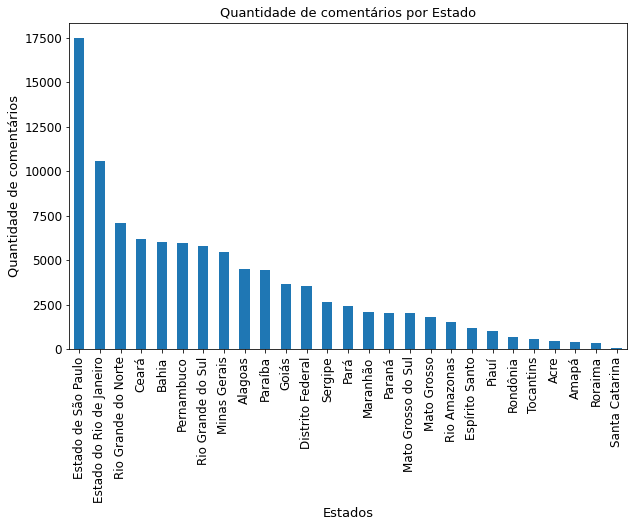

In [10]:
df_addressRegion.plot(kind='bar', figsize=[10,6])
plt.title('Quantidade de comentários por Estado', fontsize=13)
plt.xlabel('Estados', fontsize=13)
plt.ylabel('Quantidade de comentários', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Aparelhos utilizados para fazer o review

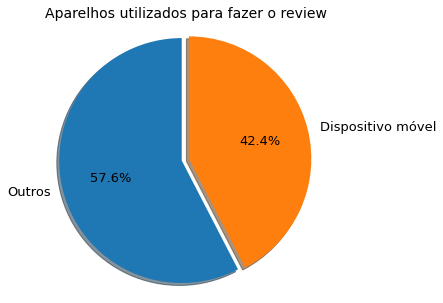

In [11]:

fig, ax1 = plt.subplots(figsize=[5,5])
ax1.pie(df_dataset['mobileDevice'].value_counts(), explode=(0, 0.06), labels=['Outros', 'Dispositivo móvel'], autopct='%1.1f%%', shadow=True, startangle=90, textprops={'size':'13'})
ax1.axis('equal')
ax1.set_title('Aparelhos utilizados para fazer o review', fontsize=14)
plt.show()

## Distribuição das notas

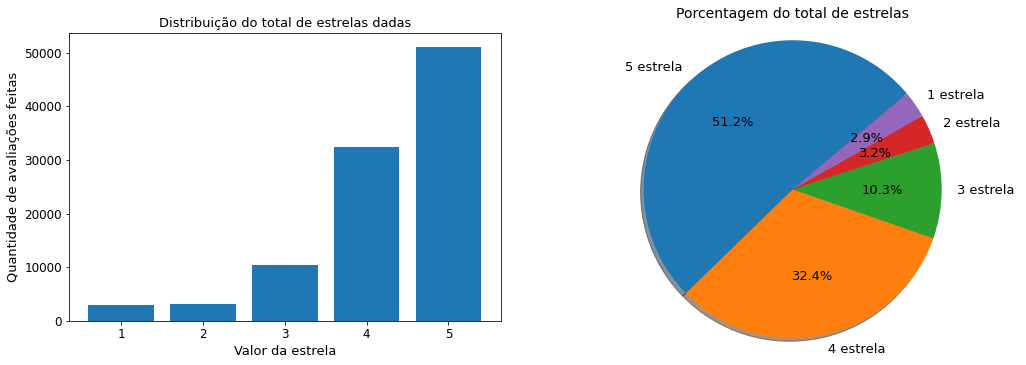

In [12]:
fig = plt.figure()
ax = fig.add_axes([0, 1, 1, 1])
ax.bar(df_dataset['ratingValue'].value_counts().keys(), df_dataset['ratingValue'].value_counts())
ax.set_title("Distribuição do total de estrelas dadas", fontsize=13)
ax.set_ylabel("Quantidade de avaliações feitas", fontsize=13)
ax.set_xlabel("Valor da estrela", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax2 = fig.add_axes([1.15, 0.88, 1.05, 1.15])
ax2.pie(df_dataset['ratingValue'].value_counts(), explode=(0, 0, 0, 0, 0), labels=['5 estrela','4 estrela','3 estrela','2 estrela','1 estrela'], autopct='%1.1f%%', shadow=True, startangle=40, textprops={'size':'13'})
ax2.axis('equal')
ax2.set_title('Porcentagem do total de estrelas', fontsize=14)

#plt.show()
fig.show()

## Média de sentenças por comentário

In [13]:
len(df_sentencas)/len(df_dataset)

3.65911

## Distribuição dos comentários e sentenças de acordo com o grau de subjetividade

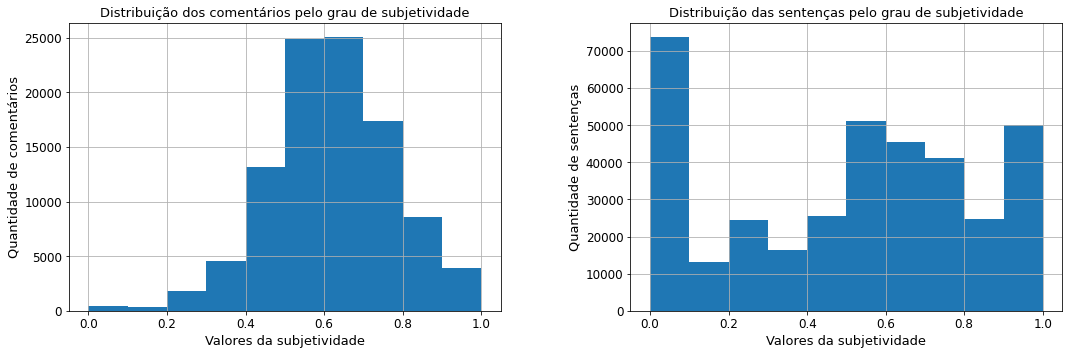

In [14]:
fig = plt.figure()
ax = fig.add_axes([0, 1, 1, 1])
ax.hist(df_comentarios['subjectivity'])
ax.set_title("Distribuição dos comentários pelo grau de subjetividade", fontsize=13)
ax.set_ylabel("Quantidade de comentários", fontsize=13)
ax.set_xlabel("Valores da subjetividade", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid()
ax2 = fig.add_axes([1.3, 1, 1, 1])
ax2.hist(df_sentencas['subjectivity'])
ax2.set_title("Distribuição das sentenças pelo grau de subjetividade", fontsize=13)
ax2.set_ylabel("Quantidade de sentenças", fontsize=13)
ax2.set_xlabel("Valores da subjetividade", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2.grid()

## Distribuição dos comentários e sentenças de acordo com o grau de polaridade

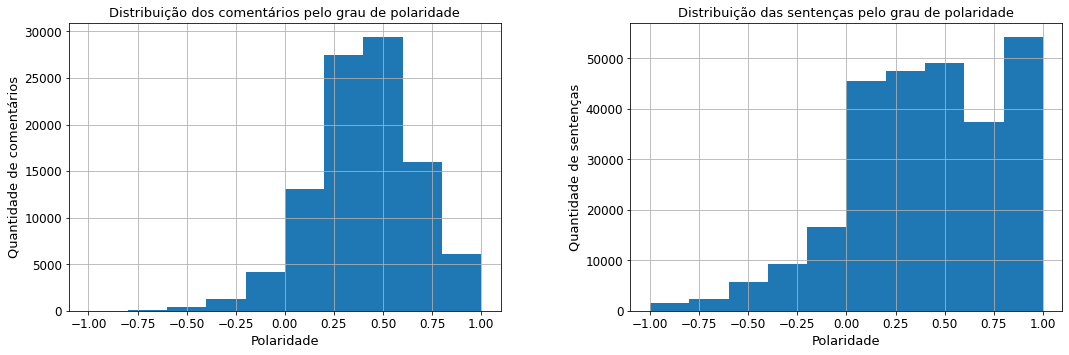

In [15]:
fig = plt.figure()
ax = fig.add_axes([0, 1, 1, 1])
ax.hist(df_comentarios[df_comentarios['subjectivity']>=SUBJETIVIDADE]['polarity'])
ax.set_title("Distribuição dos comentários pelo grau de polaridade", fontsize=13)
ax.set_ylabel("Quantidade de comentários", fontsize=13)
ax.set_xlabel("Polaridade", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid()
ax2 = fig.add_axes([1.3, 1, 1, 1])
ax2.hist(df_sentencas[df_sentencas['subjectivity']>=SUBJETIVIDADE]['polarity'])
ax2.set_title("Distribuição das sentenças pelo grau de polaridade", fontsize=13)
ax2.set_ylabel("Quantidade de sentenças", fontsize=13)
ax2.set_xlabel("Polaridade", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2.grid()

## Distribuição dos comentários e sentenças de acordo com a subjetividade

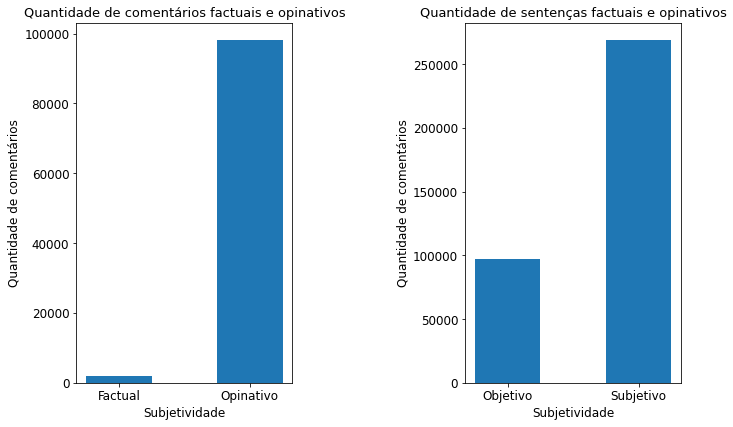

In [16]:
fig = plt.figure()
ax = fig.add_axes([0, 1, 0.5, 1.25])
ax.bar(['Factual','Opinativo'], [len(df_comentarios[df_comentarios['subjectivity']<SUBJETIVIDADE]),len(df_comentarios[df_comentarios['subjectivity']>=SUBJETIVIDADE])], width=0.5)
ax.set_title("Quantidade de comentários factuais e opinativos", fontsize=13)
ax.set_ylabel("Quantidade de comentários", fontsize=12)
ax.set_xlabel("Subjetividade", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2 = fig.add_axes([0.9, 1, 0.5 ,1.25])
ax2.bar(['Objetivo','Subjetivo'], [len(df_sentencas[df_sentencas['subjectivity']<SUBJETIVIDADE]),len(df_sentencas[df_sentencas['subjectivity']>=SUBJETIVIDADE])], width=0.5)
ax2.set_title("Quantidade de sentenças factuais e opinativos", fontsize=13)
ax2.set_ylabel("Quantidade de comentários", fontsize=12)
ax2.set_xlabel("Subjetividade", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig.show()

## Quantidade de comentários realizados por ano

In [17]:
sr_datas = pd.to_datetime(df_dataset['publicationDate'], format='%d/%m/%Y').sort_values()
sr_anos = sr_datas.apply(lambda x : x.year)
sr_anos = sr_anos.groupby(by=sr_anos).agg('count')
df_anos = sr_anos.to_frame()

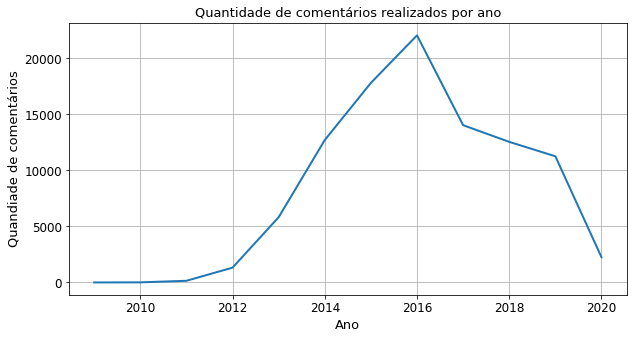

In [18]:
fig, ax = plt.subplots(figsize=[10,5])
ax.plot(list(df_anos.index), list(df_anos['publicationDate']), lw=2)
ax.set_title('Quantidade de comentários realizados por ano', fontsize=13)
ax.set_xlabel('Ano', fontsize=13)
ax.set_ylabel('Quandiade de comentários', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid()
fig.show()

## Cálculo da Medida-F, Precisão e Revocação.

## Traduzindo os comentários

In [19]:
# Método para traduzir os comentários com o GOOGLETRANS
translator = Translator.Translator()

def traduzir_googletrans(comentario) :
  try :
    comentario_traduzido = translator.translate(comentario, dest='en').text
  except : 
    comentario_traduzido = comentario
  finally :
    print(comentario_traduzido) # Apenas para acompanhamento da tradução
    time.sleep(1)
    return comentario_traduzido

In [20]:
# Método para traduzir os comentários com o TEXTBLOB
def traduzir_textblob(comentario) :
    try :
        comentario_traduzido = TextBlob(comentario).translate(to='us')
    except:
        comentario_traduzido = comentario
    finally:
        print(comentario_traduzido) # Apenas para acompanhamento da tradução
        time.sleep(1)
        return comentario_traduzido

In [21]:
sr_sentences_textblob = df_gabarito['sentence'].apply(traduzir_textblob)

If you want to try authentic Carioca food in an authentic Carioca environment, you should visit Aconchego Carioca in Tijuca.
We ate very well my husband and I and at the beginning we ordered the crab shell which was excellent.
Charming place with good service!
The place is beautiful, the landscape facing the sea, and the very exotic structure make the place unique.
Everything is wrong, they don't pay attention, it takes a long time, a noisy place.
The service is good, we had no problems with the service or waiting for the food.
Sometimes the wait is too long, but it's worth it!
The service was adequate.
Very good to kill the hunger with good prices .., Varied snacks and fast service, has a great variety of options
I prefer to go to a restaurant with a carvery service.
For me, the highlight is the guioza, which I think is the best in São Paulo.
If you want to eat Japanese supermarket food, this is not your place.
The foods are all very tasty.
The dishes are well served and a plate for t

In [22]:
sr_sentences_googletrans = df_gabarito['sentence'].apply(traduzir_googletrans)

If you want to try authentic Carioca food in an authentic Carioca environment, you should visit Aconchego Carioca in Tijuca.
We ate very well my husband and I and at the beginning we ordered the crab shell which was excellent.
Charming place with good service!
The place is beautiful, the landscape facing the sea, and the very exotic structure make the place unique.
Everything is wrong, they don't pay attention, it takes a long time, a noisy place.
The service is good, we had no problems with the service or waiting for the food.
Sometimes the wait is too long, but it's worth it!
The service was adequate.
Very good to kill the hunger with good prices .., Varied snacks and fast service, has a great variety of options
I prefer to go to a restaurant with a carvery service.
For me, the highlight is the guioza, which I think is the best in São Paulo.
If you want to eat Japanese supermarket food, this is not your place.
The foods are all very tasty.
The dishes are well served and a plate for t

In [ ]:
# Salvando as traduções em arquivo csv por segurança
#sr_sentences_textblob.to_csv('/content/drive/MyDrive/UEA - Pós Ciência de Dados/2. Programação para Ciência de Dados/ds-proc-dados-uea/artefatos/dados/200sentencas-textblob.csv')
#sr_sentences_googletrans.to_csv('/content/drive/MyDrive/UEA - Pós Ciência de Dados/2. Programação para Ciência de Dados/ds-proc-dados-uea/artefatos/dados/200sentencas-googletrans.csv')

In [ ]:
# Lendo os arquivos traduzidos caso necessários
#df_sentences_textblob = pd.read_csv('/content/drive/MyDrive/UEA - Pós Ciência de Dados/2. Programação para Ciência de Dados/ds-proc-dados-uea/artefatos/dados/200sentencas-textblob.csv', index_col=0)
#df_sentences_googletrans = pd.read_csv('/content/drive/MyDrive/UEA - Pós Ciência de Dados/2. Programação para Ciência de Dados/ds-proc-dados-uea/artefatos/dados/200sentencas-googletrans.csv', index_col=0)

## Calculando Subjetividade de ambas as traduções

In [23]:
#Função para calcular a subjetividade de um comentário
def calcular_subjetividade(comentario) :
  try :
    comentario_blob = TextBlob(comentario)
    return comentario_blob.sentiment.subjectivity
  except:
    return np.nan

In [24]:
# Transformando as Series em DataFrames - Só é executado se as traduções forem feitas na hora

df_sentences_textblob = sr_sentences_textblob.to_frame()
df_sentences_googletrans = sr_sentences_googletrans.to_frame()

In [25]:
# Calculando a subjetividade de ambas as traduções
df_sentences_textblob['subjetividade'] = df_sentences_textblob['sentence'].apply(calcular_subjetividade)
df_sentences_googletrans['subjetividade'] = df_sentences_googletrans['sentence'].apply(calcular_subjetividade)

## Definindo se a sentença é subjetiva ou objetiva

In [26]:
SUBJETIVIDADE = 0.28  # Objetivo < SUBJETIVIDADE | Opinativo >= SUBJETIVIDADE
POLARIDADE_N = 0.15   # Negativo < POLARIDADE_N 
POLARIDADE_P = 0.2    # Positivo >= POLARIDADE_P
                      # [(Neutro >= POLARIDADE_N) e (Neutro < POLARIDADE_P)]

In [27]:
def definir_subjetividade(subjetividade) :
  if subjetividade < SUBJETIVIDADE :
    return 0
  else :
    return 1

In [28]:
df_sentences_textblob['subjetividade'] = df_sentences_textblob['subjetividade'].apply(definir_subjetividade)
df_sentences_googletrans['subjetividade'] = df_sentences_googletrans['subjetividade'].apply(definir_subjetividade)

## Calculando Medida-F de ambas as análises

In [29]:
def precisao(analise, gabarito) :
  qtd_acerto = 0
  qtd_total = 0
  if (len(analise) == len(gabarito)) :
    for i in range(len(analise)) :
      if (analise[i]==1) :
        qtd_total = qtd_total + 1 # Conta a quantidade de sentenças subjetivas indicadas pelo textblob
        if (analise[i]==gabarito[i]) : 
          qtd_acerto = qtd_acerto + 1 # Conta o total de acertos que o textblob realizou referente as sentenças subjetivas do gabarito
    return qtd_acerto / qtd_total

In [30]:
def revocacao(analise, gabarito) :
  qtd_acerto = 0
  qtd_total = 0
  if (len(analise) == len(gabarito)) :
    for i in range(len(analise)) :
      if (gabarito[i]==1) :
        qtd_total = qtd_total = qtd_total + 1 # Conta a quantidade de sentenças subjetivas indicadas pelo gabarito
        if (analise[i]==1) :
          qtd_acerto = qtd_acerto + 1 # Conta o total de acerto que o textblob realizou referente as sentenças subjetivas do gabarito 
      return qtd_acerto / qtd_total


In [31]:
def medidaf(precisao, revocacao) :
  return (2 * precisao * revocacao) / (precisao + revocacao)

In [32]:
precisao_googletrans = precisao(list(df_sentences_googletrans['subjetividade']), list(df_gabarito['subjetividade']))
revocacao_googletrans = revocacao(list(df_sentences_googletrans['subjetividade']), list(df_gabarito['subjetividade']))
medidaf_googletrans = medidaf(precisao_googletrans, revocacao_googletrans)

precisao_textblob = precisao(list(df_sentences_textblob['subjetividade']), list(df_gabarito['subjetividade']))
revocacao_textblob = revocacao(list(df_sentences_textblob['subjetividade']), list(df_gabarito['subjetividade']))
medidaf_textblob = medidaf(precisao_textblob, revocacao_textblob)

In [33]:
print("\n\nMedidadeF referente à subjetividade das sentenças traduzidas pelo GOOGLETRANS\n")
print("Precisão: {0} \nRevocação: {1} \nMedida-F: {2}".format(precisao_googletrans, revocacao_googletrans, medidaf_googletrans))

print("\n\nMedidaF referente à subjetividade das senteças traduzidas pelo TEXTBLOB\n")
print("Precisão: {0} \nRevocação: {1} \nMedida-F: {2}".format(precisao_googletrans, revocacao_googletrans, medidaf_googletrans))



MedidadeF referente à subjetividade das sentenças traduzidas pelo GOOGLETRANS

Precisão: 0.8551724137931035 
Revocação: 1.0 
Medida-F: 0.9219330855018588


MedidaF referente à subjetividade das senteças traduzidas pelo TEXTBLOB

Precisão: 0.8551724137931035 
Revocação: 1.0 
Medida-F: 0.9219330855018588
